In [24]:
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [4]:
url="http://api.icndb.com/jokes/random/"
one_joke=requests.get(url).json()
pprint(one_joke)

{'type': 'success',
 'value': {'categories': [],
           'id': 21,
           'joke': "Chuck Norris doesn't shower, he only takes blood baths."}}


In [5]:
pprint(one_joke["value"])

{'categories': [],
 'id': 21,
 'joke': "Chuck Norris doesn't shower, he only takes blood baths."}


In [7]:
murl = "http://api.icndb.com/jokes/random/3"
multi_joke = requests.get(murl).json()
pprint(multi_joke)

{'type': 'success',
 'value': [{'categories': [],
            'id': 362,
            'joke': 'Chuck Norris can do a roundhouse kick faster than the '
                    'speed of light. This means that if you turn on a light '
                    'switch, you will be dead before the lightbulb turns on.'},
           {'categories': [],
            'id': 28,
            'joke': 'Chuck Norris is not hung like a horse. Horses are hung '
                    'like Chuck Norris.'},
           {'categories': [],
            'id': 111,
            'joke': 'Chuck Norris has a deep and abiding respect for human '
                    'life... unless it gets in his way.'}]}


In [8]:
pprint(multi_joke["value"])

[{'categories': [],
  'id': 362,
  'joke': 'Chuck Norris can do a roundhouse kick faster than the speed of '
          'light. This means that if you turn on a light switch, you will be '
          'dead before the lightbulb turns on.'},
 {'categories': [],
  'id': 28,
  'joke': 'Chuck Norris is not hung like a horse. Horses are hung like Chuck '
          'Norris.'},
 {'categories': [],
  'id': 111,
  'joke': 'Chuck Norris has a deep and abiding respect for human life... '
          'unless it gets in his way.'}]


In [12]:
jokes = multi_joke["value"]
for joke in jokes:
        print(f'Joke ID: {joke["id"]}')
        print(f'Joke Line: {joke["joke"]}')
        print(f'Joke Line Length(By Charater) {len(joke["joke"])}')
        print("==================================")

Joke ID: 362
Joke Line: Chuck Norris can do a roundhouse kick faster than the speed of light. This means that if you turn on a light switch, you will be dead before the lightbulb turns on.
Joke Line Length(By Charater) 164
Joke ID: 28
Joke Line: Chuck Norris is not hung like a horse. Horses are hung like Chuck Norris.
Joke Line Length(By Charater) 73
Joke ID: 111
Joke Line: Chuck Norris has a deep and abiding respect for human life... unless it gets in his way.
Joke Line Length(By Charater) 88


In [14]:
joke_list=[]
for joke in multi_joke["value"]:
    joke_list.append([joke["id"], joke["joke"], len(joke["joke"])])
print(joke_list)

[[362, 'Chuck Norris can do a roundhouse kick faster than the speed of light. This means that if you turn on a light switch, you will be dead before the lightbulb turns on.', 164], [28, 'Chuck Norris is not hung like a horse. Horses are hung like Chuck Norris.', 73], [111, 'Chuck Norris has a deep and abiding respect for human life... unless it gets in his way.', 88]]


In [18]:
chuck_data =pd.DataFrame(joke_list)
chuck_data.sample(3)

,0,1,2
2,111,Chuck Norris has a deep and abiding respect fo...,88
0,362,Chuck Norris can do a roundhouse kick faster t...,164
1,28,Chuck Norris is not hung like a horse. Horses ...,73


In [26]:
chuck_data.columns=["ID", "JOKE", "JOKE LENGTH"]
chuck_data.dropna(axis=0, how="any", inplace=True)
chuck_data.to_csv("chucknorris.csv", index=False, header=True)

In [27]:
chuck_csv = "chucknorris.csv"

In [28]:
read_file = pd.read_csv(chuck_csv)
read_file.head()

,ID,JOKE,JOKE LENGTH
0,362,Chuck Norris can do a roundhouse kick faster t...,164
1,28,Chuck Norris is not hung like a horse. Horses ...,73
2,111,Chuck Norris has a deep and abiding respect fo...,88


<function matplotlib.pyplot.show(*args, **kw)>

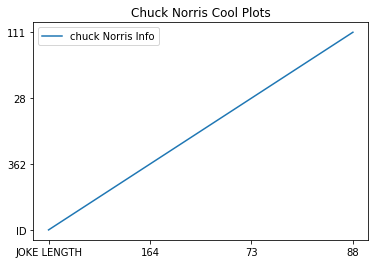

In [36]:
x=[]
y=[]

with open ("chucknorris.csv") as csvfile:
    plots = csv.reader(csvfile, delimiter=",")
    for row in plots:
        y.append(row[0])
        x.append(row[2])
#print(y)
plt.plot(x, y, label="chuck Norris Info")
#plt.xlabel("Joke ID's")
#plt.ylabel("Joke Lengths")
plt.title("Chuck Norris Cool Plots")
plt.legend()
plt.show

AttributeError: 'PathCollection' object has no property 'market'

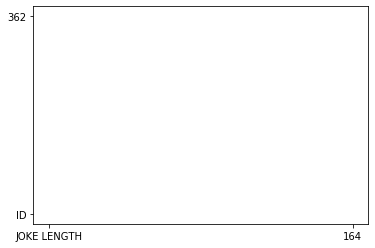

In [46]:
x_limit = 170
x_axis=np.arange(0, x_limit, 40)
data=[y for value in x] #
#plt.scatter(x_axis, data, market="o", facecolor="blue", edgecolors="blue", alpha=0.2, s=x)
#print(data)
plt.scatter(x, y, market="o", facecolor="blue", edgecolors="blue", alpha=0.2, s=x_axis)